<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
0.7859922178988327 : Training Accuracy
0.7677165354330708 : Testing Acuuracy


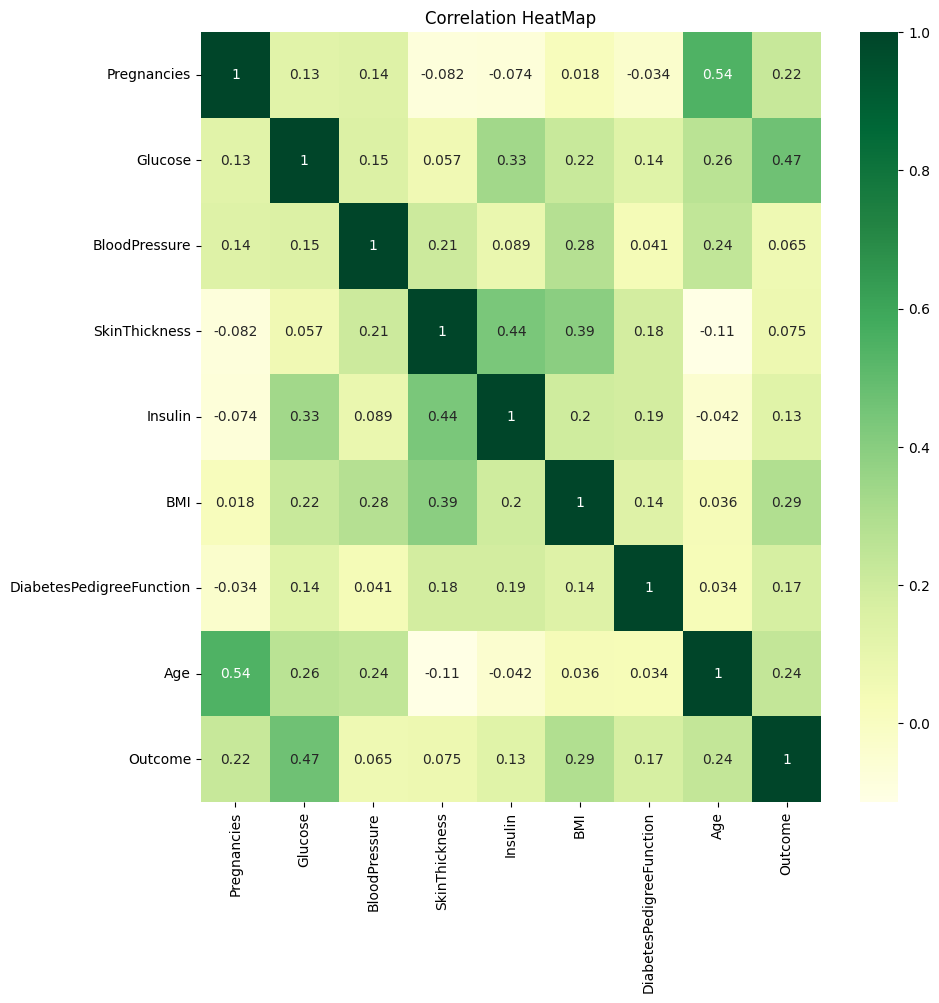

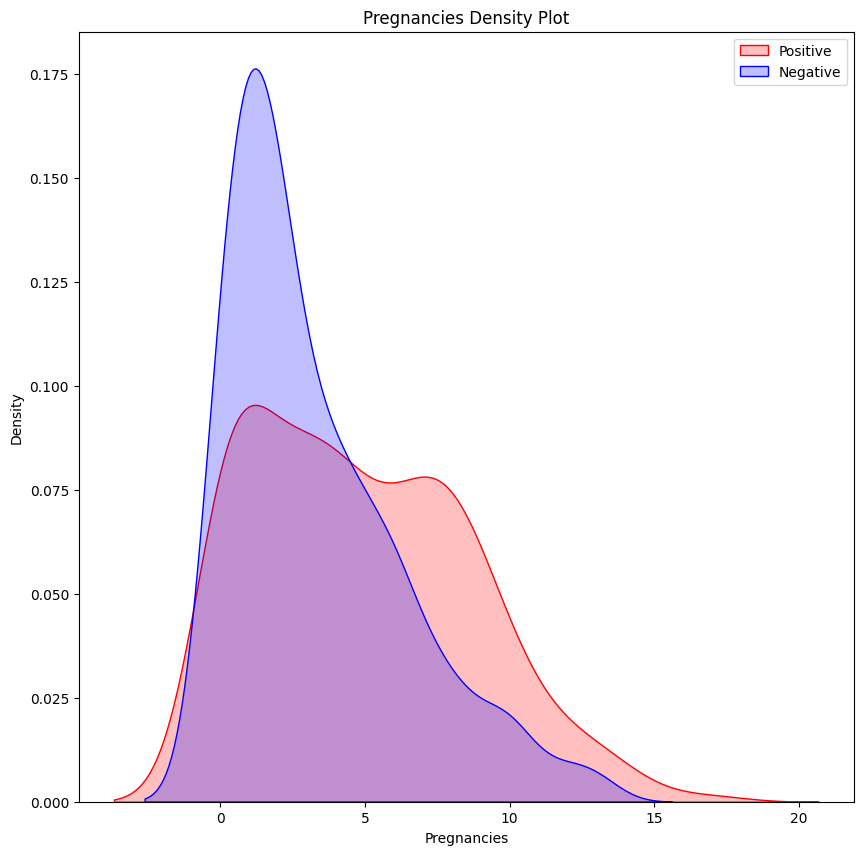

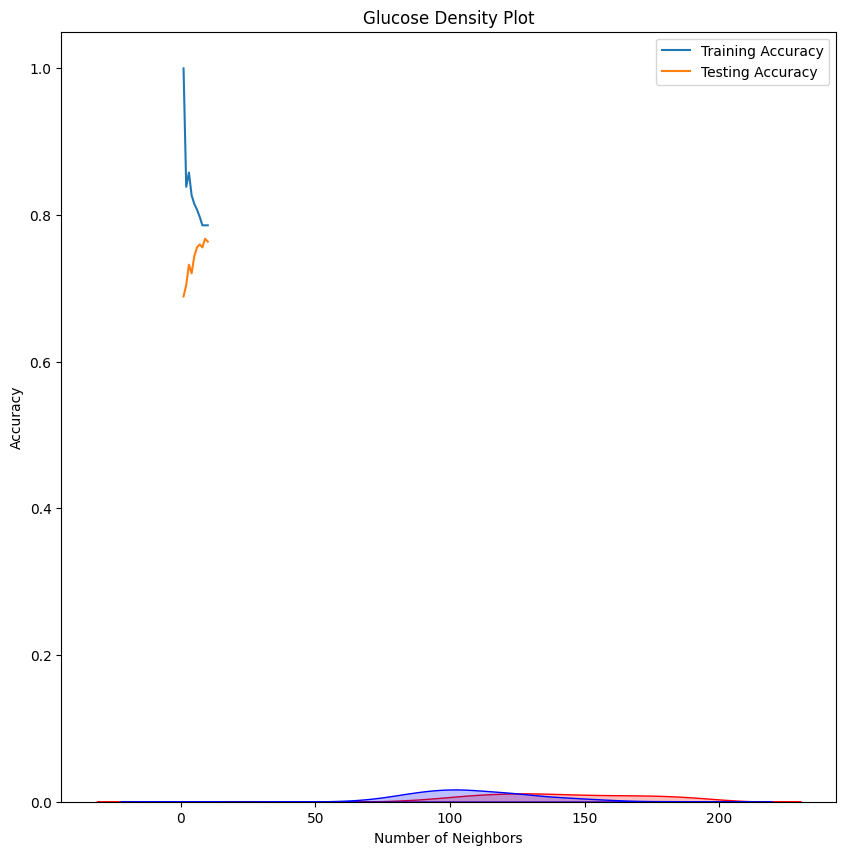

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset=pd.read_csv("/content/diabetes.csv")
dataset.info()

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGn")
plt.title("Correlation HeatMap")

plt.figure(figsize=(10,10))
kd=sns.kdeplot(dataset['Pregnancies'][dataset["Outcome"]==1],color="Red",fill=True)
kd=sns.kdeplot(dataset['Pregnancies'][dataset["Outcome"]==0],color="Blue",fill=True)
kd.set_xlabel("Pregnancies")
kd.set_ylabel("Density")
kd.legend(["Positive","Negative"])
plt.title("Pregnancies Density Plot")

plt.figure(figsize=(10,10))
kd=sns.kdeplot(dataset['Glucose'][dataset["Outcome"]==1],color="Red",fill=True)
kd=sns.kdeplot(dataset['Glucose'][dataset["Outcome"]==0],color="Blue",fill=True)
kd.set_xlabel("Glucose")
kd.set_ylabel("Density")
kd.legend(["Positive","Negative"])
plt.title("Glucose Density Plot")

#replacing 0 values by data preprocessing techniques
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].mean())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())

dataset

x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=36)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
for n_neigbors in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=n_neigbors)
  knn.fit(x_train,y_train)
  training_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

plt.plot(range(1,11),training_accuracy,label="Training Accuracy")
plt.plot(range(1,11),test_accuracy,label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": Training Accuracy")
print(knn.score(x_test,y_test),": Testing Acuuracy")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import the necessary scaling library
from sklearn.preprocessing import StandardScaler

dataset=pd.read_csv("/content/diabetes.csv")
dataset.info()

# ... (Visualization code omitted for brevity but should be kept in your notebook) ...

#replacing 0 values by data preprocessing techniques
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].mean())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())

dataset

x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

# --- NEW ADDITION: FEATURE SCALING ---
# Initialize the Standard Scaler
scaler = StandardScaler()
# Fit and transform the feature data
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)
# ------------------------------------

from sklearn.model_selection import train_test_split
# Updated random_state to 42 for a potentially better split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# Range is the same (1 to 10) for plotting
for n_neigbors in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=n_neigbors)
  knn.fit(x_train,y_train)
  training_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

plt.plot(range(1,11),training_accuracy,label="Training Accuracy")
plt.plot(range(1,11),test_accuracy,label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# --- CHANGED NUMBER: Optimal 'k' value for this dataset is usually 11, 13, or 15 ---
# Let's change the number of neighbors to 13
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": Training Accuracy")
print(knn.score(x_test,y_test),": Testing Acuuracy")